In [1]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
def ordena_imagens(imgs, sample_size):
    ordem_img = [] 
    ordem_label = []
    
    for i in range(sample_size):
        num = i + 1
        for img in imgs:
            if int(img.split('_')[1].replace('.jpg','')) == num:
                ordem_img.append(img)
                ordem_label.append(num)
    
    return ordem_img, ordem_label

In [3]:
def carrega_dataset(pasta):
    imagens = []
    
    imgs = os.listdir(pasta)
    imgs, label = ordena_imagens(imgs, int(len(imgs) / 10))
    
    for nome in imgs:
        img = cv2.imread(os.path.join(pasta, nome))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (80, 80), interpolation = cv2.INTER_AREA)
        
        if img is not None:
            imagens.append(img)
    
    return imagens, label
        

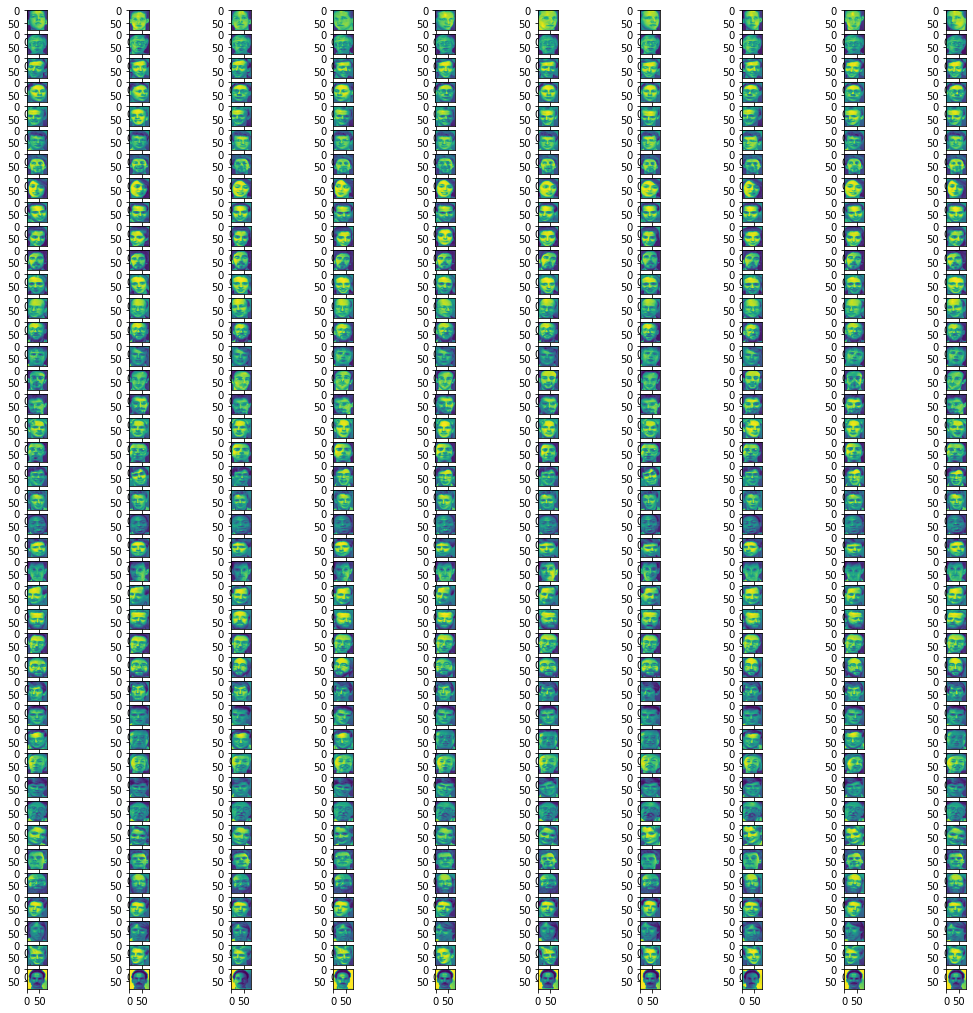

In [4]:
img , label = carrega_dataset('base/ORL2/')
fig, axes = plt.subplots(41, 10, figsize=(18,18))
for i, ax in enumerate(axes.flat):
    ax.imshow(img[i])

In [19]:
number = 0

faces_treino  = []
labels_treino = []

faces_teste  = []
labels_teste = []


for lb in label:
    
    faces_aux_treino  = []
    labels_aux_treino = []
    
    faces_aux_teste  = []
    labels_aux_teste = []
    
    if number != lb:
               
        faces_aux_treino, faces_aux_teste, labels_aux_treino, labels_aux_teste = train_test_split(img[((lb*10) -10):(lb*10)], label[((lb*10) -10):(lb*10)], test_size=0.3, random_state=25)
        
        faces_treino.extend(faces_aux_treino)
        labels_treino.extend(labels_aux_treino)
        
        faces_teste.extend(faces_aux_teste)
        labels_teste.extend(labels_aux_teste)
        
        number = lb

In [20]:
def run_treino_predicao(n_componente):
    face_recognizer = cv2.face.EigenFaceRecognizer_create(n_componente)
    face_recognizer.train(faces_treino, np.array(labels_treino))

    labels_predicted = []

    for i, face in enumerate(faces_teste):
        lb, confidence = face_recognizer.predict(face)
        labels_predicted.append(lb)
    
    print(n_componente, 'Componentes principais, acurácia: ', round(accuracy_score(labels_predicted, labels_teste) * 100, 2), '%')
    

In [21]:
for componentes in range(10,21):
    run_treino_predicao(componentes)

10 Componentes principais, acurácia:  94.31 %
11 Componentes principais, acurácia:  95.12 %
12 Componentes principais, acurácia:  95.12 %
13 Componentes principais, acurácia:  95.12 %
14 Componentes principais, acurácia:  93.5 %
15 Componentes principais, acurácia:  93.5 %
16 Componentes principais, acurácia:  94.31 %
17 Componentes principais, acurácia:  94.31 %
18 Componentes principais, acurácia:  93.5 %
19 Componentes principais, acurácia:  93.5 %
20 Componentes principais, acurácia:  94.31 %
